# Classification Cluster Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
stocks_dict = {
    'Advanced Micro Devices':'AMD',
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds':  'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC', 
    'Petrobras': 'PBR',
    'Vale': 'VALE'}

In [3]:
# Split dict into list of companies and symbols
names, symbols = np.array(list(stocks_dict.items())).T

In [5]:
start = '2017-01-01'
end = '2017-12-31'

print("Downloading values for period %s to %s:" % (start, end))
dataset = [yf.download(symbol,start,end) for symbol in symbols]
print("Done!")

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [7]:
# Get opening price
open_price = np.array([p["Open"] for p in dataset]).astype(np.float)

# Get closing price
close_price = np.array([p["Adj Close"] for p in dataset]).astype(np.float)

In [8]:
# Calculate percent change
X = (close_price - open_price) / open_price

In [10]:
from sklearn.cluster import KMeans

# Define the number of clusters in a variable 'n_clusters'
n_clusters = 12

# Cluster the data
kmeans = KMeans(n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# Print results
labels = kmeans.labels_
for i in range(n_clusters):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Honda, Lockheed Martin, Intel, McDonalds, Toyota, Johnson & Johnson, Texas Instruments
Cluster 2: Navistar
Cluster 3: General Electrics
Cluster 4: MasterCard, Sony, Amazon
Cluster 5: Microsoft, Northrop Grumman, Boeing, Bank of America, Symantec, American Express, Apple
Cluster 6: Advanced Micro Devices
Cluster 7: Vale
Cluster 8: Exxon, Chevron, IBM
Cluster 9: Pepsi, Coca Cola, Mistubishi, Valero Energy
Cluster 10: Walgreen
Cluster 11: Petrobras
Cluster 12: Ford


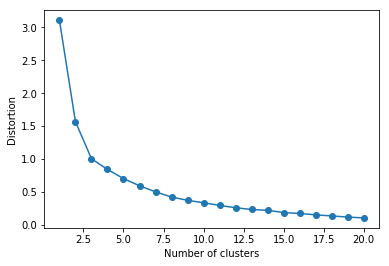

In [12]:
min_clusters = 1
max_clusters = 20
distortions = []
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot
plt.plot(range(min_clusters, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer


normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=10, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [14]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [16]:
print(kmeans.inertia_)

1.0479387315234514


In [18]:
labels = pipeline.predict(X)

df = pd.DataFrame({'labels':labels,'companies':names})

print(df.sort_values('labels'))

                 companies  labels
0                Microsoft       0
25                    Vale       0
24           Valero Energy       0
22       General Electrics       0
20              Mistubishi       0
19                     IBM       0
18                Walgreen       0
29       Johnson & Johnson       0
12                  Boeing       0
11               Coca Cola       0
15                  Toyota       0
9                McDonalds       0
2                    Honda       0
3          Lockheed Martin       0
10                   Pepsi       0
5         Northrop Grumman       0
6                    Exxon       0
4                     Ford       0
7                    Intel       0
8                  Chevron       0
30       Texas Instruments       0
27                  Amazon       1
17                Navistar       2
1                Petrobras       3
26                    Sony       4
21  Advanced Micro Devices       5
14              MasterCard       6
28                  

In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new_X = normalizer.fit_transform(X)

print(new_X.max())
print(new_X.min())
print(new_X.mean())

0.290510178654611
-0.28571025102742664
-0.05092923629722951


In [22]:
from sklearn.decomposition import PCA

#visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new_X)

#run kmeans on the reduced data
kmeans = KMeans(n_clusters =10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

#Create a dataframe

df = pd.DataFrame({'labels':labels,'companies':names})

#sorted by cluster labels
print(df.sort_values('labels'))

0.021621993804491726
                 companies  labels
24           Valero Energy       0
4                     Ford       0
22       General Electrics       0
6                    Exxon       0
8                  Chevron       0
19                     IBM       0
21  Advanced Micro Devices       1
1                Petrobras       2
28                   Apple       3
16                Symantec       3
17                Navistar       4
0                Microsoft       5
30       Texas Instruments       5
5         Northrop Grumman       5
14              MasterCard       6
26                    Sony       6
27                  Amazon       7
13         Bank of America       8
25                    Vale       8
2                    Honda       9
3          Lockheed Martin       9
23        American Express       9
7                    Intel       9
20              Mistubishi       9
9                McDonalds       9
18                Walgreen       9
10                   Pepsi       9

<Figure size 432x288 with 0 Axes>

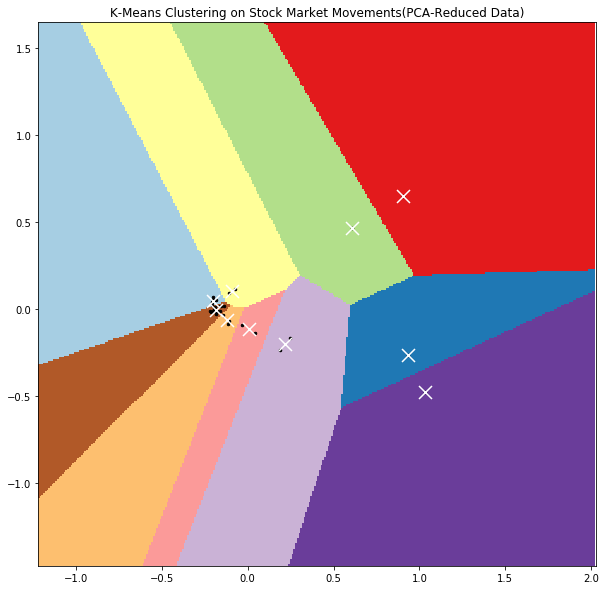

In [23]:


#step size of mesh
h = 0.01

#plot decision boundary
x_min =  reduced_data[:,0].min() -1
x_max = reduced_data[:,0].max() +1

y_min = reduced_data[:,1].min()-1
y_max = reduced_data[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

#obtain labels for each point in the mesh

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#result into a color plot

Z = Z.reshape(xx.shape)

#define color plot
cmap = plt.cm.Paired

#plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation='nearest',
          extent = (xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,
                    aspect = 'auto', origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize=5)

#plot the centroid of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],
           marker='x',s=169, linewidths =3, color ='w',zorder =10)
plt.title('K-Means Clustering on Stock Market Movements(PCA-Reduced Data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()